In [3]:
%pip install -Uqq fastbook

import fastbook
fastbook.setup_book()

from fastbook import *

from fastai.vision.all import *

Mounted at /content/gdrive


In [4]:
path = untar_data(URLs.PASCAL_2007)
path.ls()

(#8) [Path('/root/.fastai/data/pascal_2007/train.json'),Path('/root/.fastai/data/pascal_2007/segmentation'),Path('/root/.fastai/data/pascal_2007/train'),Path('/root/.fastai/data/pascal_2007/test.json'),Path('/root/.fastai/data/pascal_2007/test'),Path('/root/.fastai/data/pascal_2007/train.csv'),Path('/root/.fastai/data/pascal_2007/valid.json'),Path('/root/.fastai/data/pascal_2007/test.csv')]

In [6]:
df=pd.read_csv(path/'train.csv')

In [7]:
df

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True
...,...,...,...
5006,009954.jpg,horse person,True
5007,009955.jpg,boat,True
5008,009958.jpg,person bicycle,True
5009,009959.jpg,car,False


In [8]:
dls = ImageDataLoaders.from_df(df, path, folder='train', valid_col='is_valid', label_delim=' ',
                               item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

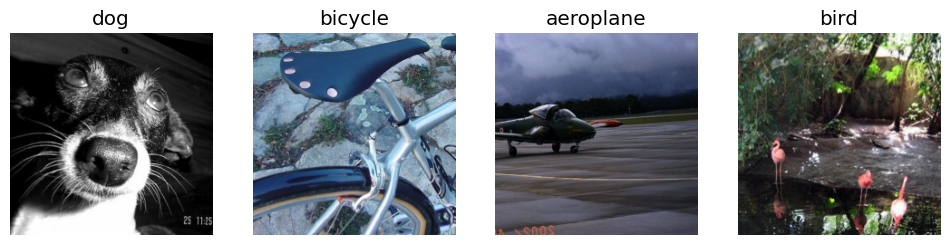

In [12]:
dls.show_batch(max_n=4, nrows=1)

In [13]:
f1_macro = F1ScoreMulti(thresh=0.7, average='macro')
f1_macro.name = 'F1(macro)'
f1_samples = F1ScoreMulti(thresh=0.7, average='samples')
f1_samples.name = 'F1(samples)'
learn = vision_learner(dls, resnet50, metrics=[partial(accuracy_multi, thresh=0.7), f1_macro, f1_samples])

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 57.5MB/s]


SuggestedLRs(valley=0.0014454397605732083)

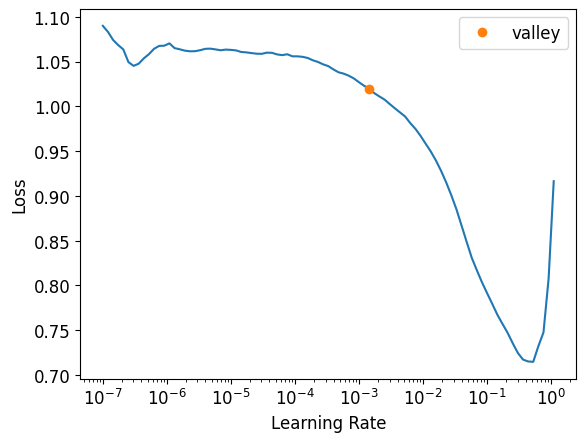

In [14]:
learn.lr_find()

In [20]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy_multi,F1(macro),F1(samples),time
0,0.588002,0.356141,0.954103,0.702976,0.779219,00:49


epoch,train_loss,valid_loss,accuracy_multi,F1(macro),F1(samples),time
0,0.416310,0.260083,0.972012,0.801679,0.830992,00:52
1,0.305138,0.137338,0.975378,0.791293,0.821263,00:51


KeyboardInterrupt: ignored

In [21]:
learn.predict('/content/download.jpg')

epoch,train_loss,valid_loss,accuracy_multi,F1(macro),F1(samples),time
0,0.416310,0.260083,0.972012,0.801679,0.830992,00:52
1,0.305138,0.137338,0.975378,0.791293,0.821263,00:51


((#1) ['cow'],
 tensor([False, False, False, False, False, False, False, False, False,  True, False, False, False, False, False, False, False, False, False, False]),
 tensor([0.1411, 0.1020, 0.2434, 0.1474, 0.1387, 0.1357, 0.0933, 0.0415, 0.0632, 0.7066, 0.0716, 0.0929, 0.1157, 0.1276, 0.1396, 0.0839, 0.2047, 0.1277, 0.1156, 0.0869]))